In [1]:
import sys
sys.path.append('..')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC as sklearnSVC
from svm.SVC import SVC

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [4]:

# Train a SVM model
model = sklearnSVC()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM: {accuracy}')

# mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of SVM: {mse}')


Accuracy of SVM: 0.9111111111111111
Mean Squared Error of SVM: 0.08888888888888889


In [3]:
# Train our SVM model
model2 = SVC()
model2.fit(X_train, y_train)

# Predict the test set
y_pred2 = model2.predict(X_test)

# Calculate the accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy of our SVM: {accuracy2}')

# mean squared error
mse2 = mean_squared_error(y_test, y_pred2)
print(f'Mean Squared Error of our SVM: {mse2}')


Accuracy of our SVM: 0.15555555555555556
Mean Squared Error of our SVM: 1.5777777777777777


In [2]:
import numpy as np
from model_selection import train_test_split
from metrics import accuracy_score
import time
from svm.OpSVC import SVC as SVClassifier

from sklearn.datasets import fetch_covtype

data = fetch_covtype()

# function to get random range from dataset with size
def get_random_range(data, size):
    idx = np.random.choice(data.data.shape[0], size, replace=False)
    return data.data[idx], data.target[idx]

def benchmark_classifier():
    accuracies = []
    trainig_times = []

    for i in range(100, 5000, 50):
        X, y = get_random_range(data, i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        clf = SVClassifier()
        start = time.time()
        clf.fit(X_train, y_train)
        trainig_times.append(time.time() - start)
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    # plot the results
    import matplotlib.pyplot as plt
    plt.plot(range(100, 5000, 50), accuracies)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of samples')
    plt.show()

    plt.plot(range(100, 5000, 50), trainig_times)
    plt.xlabel('Number of samples')
    plt.ylabel('Time')
    plt.title('Time vs Number of samples')
    plt.show()
    


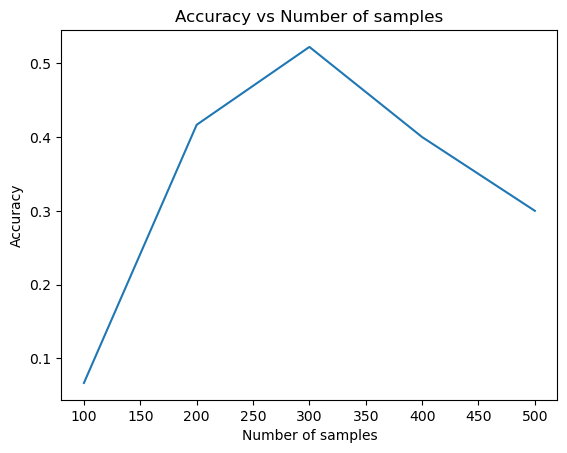

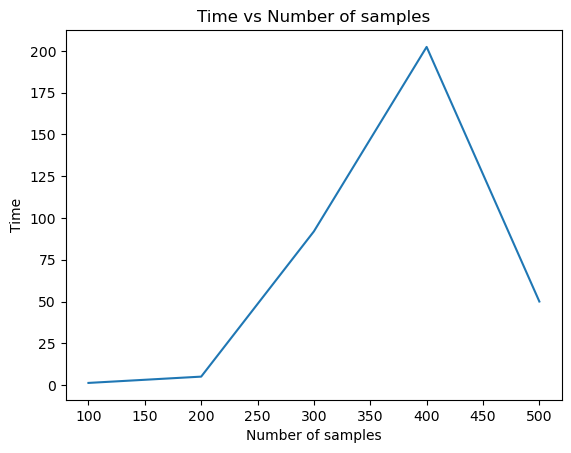

In [5]:
accuracies = []
trainig_times = []

for i in range(100, 501, 100):
    X, y = get_random_range(data, i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = SVClassifier()
    start = time.time()
    clf.fit(X_train, y_train)
    trainig_times.append(time.time() - start)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# plot the results
import matplotlib.pyplot as plt
plt.plot(range(100, 501, 100), accuracies)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of samples')
plt.show()

plt.plot(range(100, 501, 100), trainig_times)
plt.xlabel('Number of samples')
plt.ylabel('Time')
plt.title('Time vs Number of samples')
plt.show()

In [ ]:
benchmark_classifier()

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from svm.SVR import SVR

# Load regression dataset
diabetes = load_diabetes()
X_regression, y_regression = diabetes.data, diabetes.target

# Split data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Train a SVM regression model
model_reg = SVR()
model_reg.fit(X_train_reg, y_train_reg)

# Train our SVM regression model
model2_reg = SVMRegressor()
model2_reg.fit(X_train_reg, y_train_reg)

# Predict the test set
y_pred_reg = model_reg.predict(X_test_reg)
y_pred2_reg = model2_reg.predict(X_test_reg)

# Calculate the mean squared error
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
mse2_reg = mean_squared_error(y_test_reg, y_pred2_reg)

print(f'Mean Squared Error of sklearn SVM Regression: {mse_reg}')
print(f'Mean Squared Error of our SVM Regression: {mse2_reg}')


Mean Squared Error of sklearn SVM Regression: 4333.285954518086
Mean Squared Error of our SVM Regression: 254076.5215125209


In [5]:
from svm.OpSVR import SVR as SVRegressor

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import time

# Load the california housing dataset
data = fetch_california_housing()

# function to get random range from dataset with size
def get_random_range(data, size):
    idx = np.random.choice(data.data.shape[0], size, replace=False)
    return data.data[idx], data.target[idx]

def benchmark_regressor():
    mse = []
    train_times = []
    for i in range(100, 5000, 50):
        X, y = get_random_range(data, i)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        reg = SVRegressor()
        start = time.time()
        reg.fit(X_train, y_train)
        train_times.append(time.time() - start)
        y_pred = reg.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
    
    # plot the results
    import matplotlib.pyplot as plt
    plt.plot(range(100, 5000, 50), mse)
    plt.xlabel('Number of samples')
    plt.ylabel('MSE')
    plt.title('MSE vs Number of samples')
    plt.show()

    plt.plot(range(100, 5000, 50), train_times)
    plt.xlabel('Number of samples')
    plt.ylabel('Training time')
    plt.title('Training time vs Number of samples')
    plt.show()




MSE: 15143.284229780322


In [ ]:


benchmark_regressor()